## About Datasets

**Context**

Credit score cards are a common risk control method in the financial industry. It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings. The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.
 
Generally speaking, credit score cards are based on historical data. Once encountering large economic fluctuations. Past models may lose their original predictive power. Logistic model is a common method for credit scoring. Because Logistic is suitable for binary classification tasks and can calculate the coefficients of each feature. In order to facilitate understanding and operation, the score card will multiply the logistic regression coefficient by a certain value (such as 100) and round it.
 
At present, with the development of machine learning algorithms. More predictive methods such as Boosting, Random Forest, and Support Vector Machines have been introduced into credit card scoring. However, these methods often do not have good transparency. It may be difficult to provide customers and regulators with a reason for rejection or acceptance.

**Goal**

Build a machine learning model to predict if an applicant is 'good' or 'bad' client, different from other tasks, the definition of '*good*' or '*bad*' is not given. You should use some techique, such as [vintage analysis][1] to construct you label. Also, unbalance data problem is a big problem in this task.

[1]: <https://www.kaggle.com/code/rikdifos/eda-vintage-analysis/notebook> "kaggle notebook"

**Details**

<table>
<thead>
<tr>
<th>application_record.csv</th>
<th></th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<td>Feature name</td>
<td>Explanation</td>
<td>Remarks</td>
</tr>
<tr>
<td><code>ID</code></td>
<td>Client number</td>
<td></td>
</tr>
<tr>
<td><code>CODE_GENDER</code></td>
<td>Gender</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_OWN_CAR</code></td>
<td>Is there a car</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_OWN_REALTY</code></td>
<td>Is there a property</td>
<td></td>
</tr>
<tr>
<td><code>CNT_CHILDREN</code></td>
<td>Number of children</td>
<td></td>
</tr>
<tr>
<td><code>AMT_INCOME_TOTAL</code></td>
<td>Annual income</td>
<td></td>
</tr>
<tr>
<td><code>NAME_INCOME_TYPE</code></td>
<td>Income category</td>
<td></td>
</tr>
<tr>
<td><code>NAME_EDUCATION_TYPE</code></td>
<td>Education level</td>
<td></td>
</tr>
<tr>
<td><code>NAME_FAMILY_STATUS</code></td>
<td>Marital status</td>
<td></td>
</tr>
<tr>
<td><code>NAME_HOUSING_TYPE</code></td>
<td>Way of living</td>
<td></td>
</tr>
<tr>
<td><code>DAYS_BIRTH</code></td>
<td>Birthday</td>
<td>Count backwards from current day (0), -1 means yesterday</td>
</tr>
<tr>
<td><code>DAYS_EMPLOYED</code></td>
<td>Start date  of employment</td>
<td>Count backwards from current day(0). If  positive, it means the person currently unemployed.</td>
</tr>
<tr>
<td><code>FLAG_MOBIL</code></td>
<td>Is there a mobile   phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_WORK_PHONE</code></td>
<td>Is there a work phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_PHONE</code></td>
<td>Is there a phone</td>
<td></td>
</tr>
<tr>
<td><code>FLAG_EMAIL</code></td>
<td>Is there an email</td>
<td></td>
</tr>
<tr>
<td><code>OCCUPATION_TYPE</code></td>
<td>Occupation</td>
<td></td>
</tr>
<tr>
<td><code>CNT_FAM_MEMBERS</code></td>
<td>Family size</td>
<td></td>
</tr>
</tbody>
</table>

<br></br>

<table>
<thead>
<tr>
<th>credit_record.csv</th>
<th></th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<td>Feature name</td>
<td>Explanation</td>
<td>Remarks</td>
</tr>
<tr>
<td><code>ID</code></td>
<td>Client number</td>
<td></td>
</tr>
<tr>
<td><code>MONTHS_BALANCE</code></td>
<td>Record month</td>
<td>The month of the extracted data is the starting point,  backwards, 0 is the current month, -1 is the previous month,  and so on</td>
</tr>
<tr>
<td><code>STATUS</code></td>
<td>Status</td>
<td>0: 1-29 days past due 1: 30-59 days past due   2: 60-89 days overdue 3: 90-119 days overdue    4: 120-149 days overdue 5: Overdue or bad debts, write-offs for more than 150 days    C: paid off that month X: No loan for the month</td>
</tr>
</tbody>
</table>

In [1]:
import pandas as pd
import numpy as np
import os
import caseData
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
APPLI = os.path.join(os.getcwd(), 'data', 'application_record.csv')
CREDIT = os.path.join(os.getcwd(), 'data', 'credit_record.csv')

In [3]:
df = pd.read_csv(APPLI)
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [4]:
df2 = pd.read_csv(CREDIT)
df2

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


## Case Study One
Raise integers of 1 for every time user late to pay

In [5]:
# data loading
df_caseOne = caseData.data(application=df, credit=df2)
df_test = df_caseOne.caseOne()
df_test

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,window,due_count,bad_cus
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,45,2,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,46,2,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,31,7,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,56,2,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,56,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31505,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,49,4,0
31506,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,37,19,1
31507,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,28,19,1
31508,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2.0,51,10,1


In [6]:
# data inspection
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31510 entries, 0 to 31509
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   31510 non-null  int64  
 1   CODE_GENDER          31510 non-null  object 
 2   FLAG_OWN_CAR         31510 non-null  object 
 3   FLAG_OWN_REALTY      31510 non-null  object 
 4   CNT_CHILDREN         31510 non-null  int64  
 5   AMT_INCOME_TOTAL     31510 non-null  float64
 6   NAME_INCOME_TYPE     31510 non-null  object 
 7   NAME_EDUCATION_TYPE  31510 non-null  object 
 8   NAME_FAMILY_STATUS   31510 non-null  object 
 9   NAME_HOUSING_TYPE    31510 non-null  object 
 10  DAYS_BIRTH           31510 non-null  int64  
 11  DAYS_EMPLOYED        31510 non-null  int64  
 12  FLAG_MOBIL           31510 non-null  int64  
 13  FLAG_WORK_PHONE      31510 non-null  int64  
 14  FLAG_PHONE           31510 non-null  int64  
 15  FLAG_EMAIL           31510 non-null 

In [7]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,31510.0,5.078031e+06,41993.213131,5008804.0,5041851.25,5074626.0,5115396.75,5150487.0
CNT_CHILDREN,31510.0,4.331323e-01,0.737816,0.0,0.00,0.0,1.00,19.0
AMT_INCOME_TOTAL,31510.0,1.865843e+05,102328.321309,27000.0,121500.00,157500.0,225000.00,1575000.0
DAYS_BIRTH,31510.0,-1.589988e+04,4228.733568,-25152.0,-19398.75,-15481.0,-12341.75,-7489.0
DAYS_EMPLOYED,31510.0,5.910984e+04,137462.298884,-15713.0,-3088.00,-1516.5,-407.00,365243.0
FLAG_MOBIL,31510.0,1.000000e+00,0.000000,1.0,1.00,1.0,1.00,1.0
FLAG_WORK_PHONE,31510.0,2.239924e-01,0.416924,0.0,0.00,0.0,0.00,1.0
FLAG_PHONE,31510.0,2.928911e-01,0.455096,0.0,0.00,0.0,1.00,1.0
FLAG_EMAIL,31510.0,8.949540e-02,0.285462,0.0,0.00,0.0,0.00,1.0
CNT_FAM_MEMBERS,31510.0,2.197778e+00,0.910712,1.0,2.00,2.0,3.00,20.0


In [8]:
df_test.isna().mean()*100

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.996509
CNT_FAM_MEMBERS         0.000000
window                  0.000000
due_count               0.000000
bad_cus                 0.000000
dtype: float64

In [9]:
df_test.duplicated().sum()

0

In [10]:
# Feature engineering
def features(df):
    df['AGE'] = abs(df.DAYS_BIRTH // 365)
    df['FLAG_EMPLOYED'] = (df.DAYS_EMPLOYED > 0).astype(int)
    return df

df_test = features(df_test)
df_test

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,window,due_count,bad_cus,AGE,FLAG_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,45,2,0,33,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,NaN,2.0,46,2,0,33,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,31,7,1,59,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,56,2,0,53,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,56,0,0,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31505,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Managers,2.0,49,4,0,48,0
31506,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,0,1,1,Medicine staff,2.0,37,19,1,34,0
31507,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,0,1,1,Medicine staff,2.0,28,19,1,34,0
31508,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Sales staff,2.0,51,10,1,50,0


In [11]:
df_test.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'window',
       'due_count', 'bad_cus', 'AGE', 'FLAG_EMPLOYED'],
      dtype='object')

In [12]:
# selecting columns based on condition
df_test.columns[(df_test.nunique()<=2) | (df_test.dtypes=='object')]

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'bad_cus', 'FLAG_EMPLOYED'],
      dtype='object')

In [13]:
# divide into categorical or continous
cat = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'bad_cus', 'FLAG_EMPLOYED']

con = df_test.columns[~df_test.columns.isin(cat)].tolist()
con.remove('ID')

In [31]:
# categorical plot
def plotCat(graphs_col, dataframe, figsize):
    graphs_col = graphs_col
    graphs_row = (len(dataframe.columns) // graphs_col) + (len(dataframe.columns) % graphs_col > 0)

    fig = plt.figure(figsize=figsize)
    for i in range(1, len(dataframe.columns)+1):
        ax = fig.add_subplot(graphs_row, graphs_col, i)
        sns.countplot(x=dataframe.iloc[:, i-1] ,ax=ax)
        plt.xticks(rotation=90)
        plt.tight_layout()

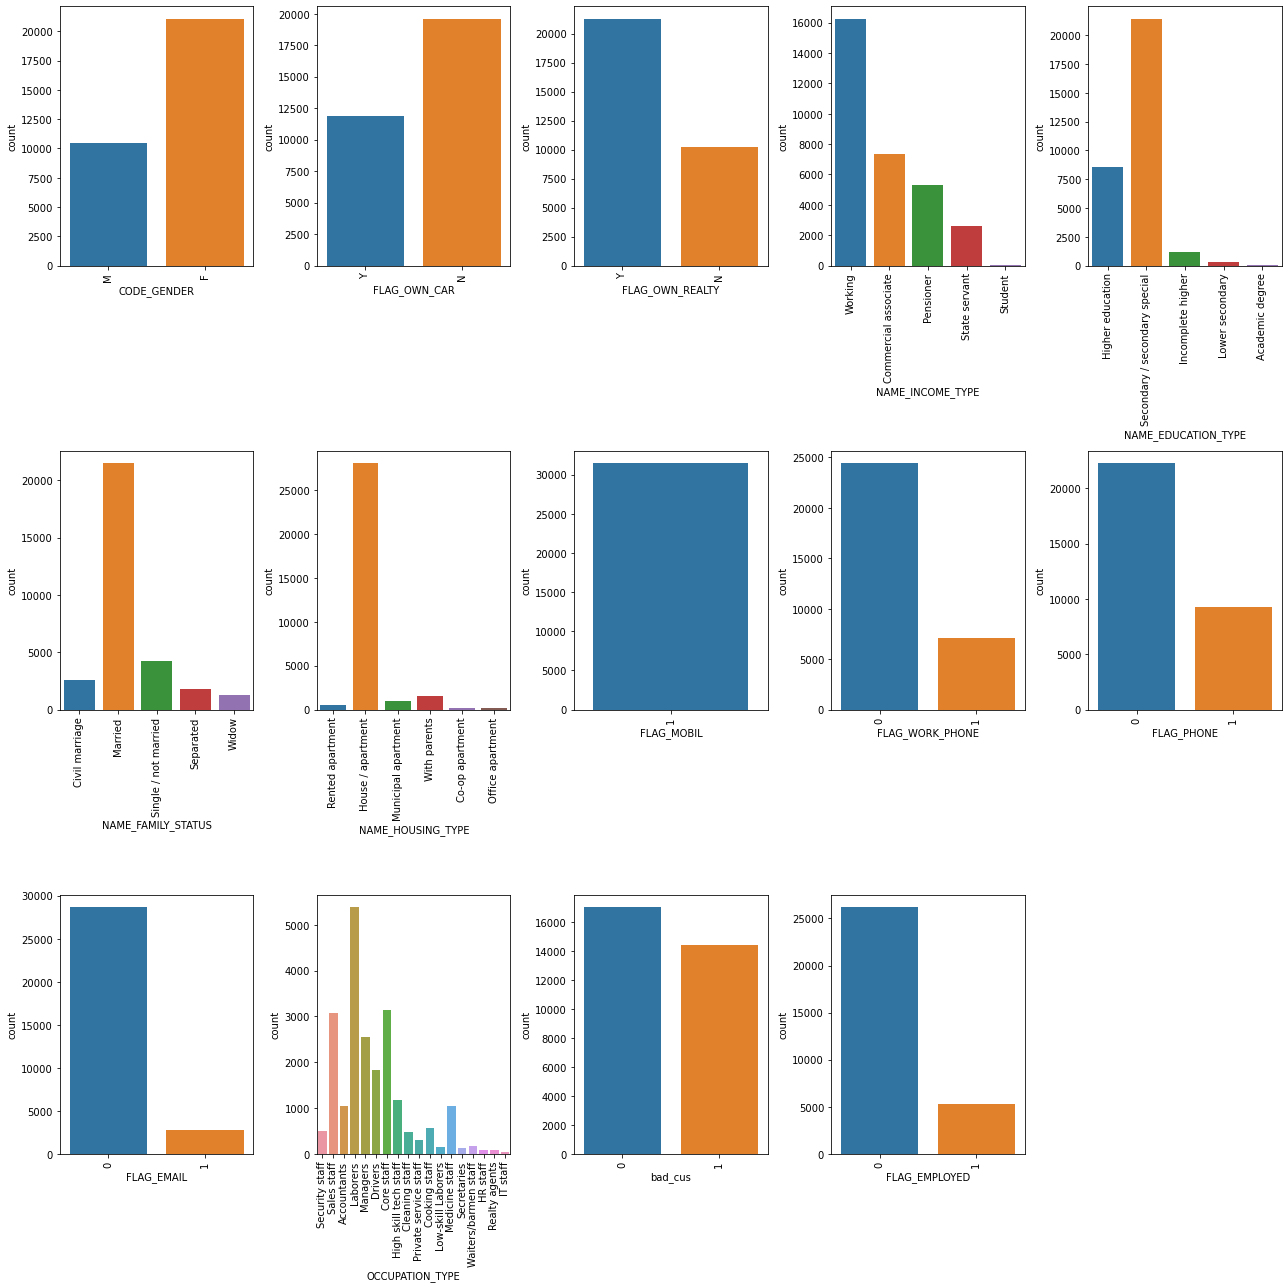

In [32]:
plotCat(graphs_col=5, dataframe=df_test[cat], figsize=(18, 18))